In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_2018 = pd.read_csv("developer_survey_2018/survey_results_public.csv")

C:\Users\Bader\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 1) Pick a Dataset 

In this project, I would like to work with Stack Overflow 2018 Survey.

In [3]:
print("Stackoverflow 2018 Dataset Number of Rows:", len(df_2018))
print("Stackoverflow 2018 Dataset Number of Features:", len(df_2018.columns))

Stackoverflow 2018 Dataset Number of Rows: 98855
Stackoverflow 2018 Dataset Number of Features: 129


# 2) Pose at least three questions related to business or real-world applications of how the data could be used

1. What is the average age by country?
2. What is the average IT Experince by country?
3. What is the most popular development language?

# 3) Prepare data

In [4]:
columns_2018 = df_2018.columns

print("2018 Features: ")
print(columns_2018)

2018 Features: 
Index(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType',
       ...
       'Exercise', 'Gender', 'SexualOrientation', 'EducationParents',
       'RaceEthnicity', 'Age', 'Dependents', 'MilitaryUS', 'SurveyTooLong',
       'SurveyEasy'],
      dtype='object', length=129)


First we will select the subset of the data we need to answer our questions. 

In [74]:
# Get required columns 
df_2018_sub = df_2018.iloc[:,[3,11,65,124]]
df_2018_sub.columns = ['country','ITExperince','languages','age']

# Merge all Data 
df_working = df_2018_sub.copy()
df_working.reset_index(inplace=True,drop = True)
df_working.head()

,country,ITExperince,languages,age
0,Kenya,3-5 years,JavaScript;Python;HTML;CSS,25 - 34 years old
1,United Kingdom,18-20 years,JavaScript;Python;Bash/Shell,35 - 44 years old
2,United States,6-8 years,NaN,NaN
3,United States,12-14 years,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,35 - 44 years old
4,South Africa,0-2 years,C;C++;Java;Matlab;R;SQL;Bash/Shell,18 - 24 years old


Since all of the data columns are textual, then it will be a good idea to strip-out spaces and ensure all data have the same upper/lower case. 

In [76]:
df_working['country'] = df_working['country'].str.strip()
df_working['age'] = df_working['age'].str.strip()
df_working['ITExperince'] = df_working['ITExperince'].str.strip()
df_working['languages'] = df_working['languages'].str.strip()

df_working['country'] = df_working['country'].str.lower()
df_working['age'] = df_working['age'].str.lower()
df_working['ITExperince'] = df_working['ITExperince'].str.lower()
df_working['languages'] = df_working['languages'].str.lower()

## 3.1 Handle categorical and missing data

First, we will look at the country column and assess the values. 

In [77]:
countries_list = df_working.country.value_counts()
print(countries_list.index.values)

['united states' 'india' 'germany' 'united kingdom' 'canada'
 'russian federation' 'france' 'brazil' 'poland' 'australia' 'netherlands'
 'spain' 'italy' 'ukraine' 'sweden' 'pakistan' 'china' 'switzerland'
 'turkey' 'israel' 'iran, islamic republic of...' 'romania' 'austria'
 'czech republic' 'belgium' 'mexico' 'bangladesh' 'denmark' 'south africa'
 'indonesia' 'argentina' 'norway' 'new zealand' 'ireland' 'portugal'
 'finland' 'philippines' 'greece' 'hungary' 'sri lanka' 'bulgaria' 'egypt'
 'nigeria' 'singapore' 'malaysia' 'japan' 'serbia' 'belarus' 'colombia'
 'viet nam' 'nepal' 'lithuania' 'croatia' 'chile' 'slovakia' 'slovenia'
 'hong kong (s.a.r.)' 'morocco' 'thailand' 'taiwan' 'kenya'
 'united arab emirates' 'estonia' 'south korea' 'tunisia' 'latvia'
 'algeria' 'saudi arabia' 'peru' 'bosnia and herzegovina'
 'venezuela, bolivarian republic of...' 'armenia' 'dominican republic'
 'albania' 'kazakhstan' 'lebanon' 'uruguay' 'costa rica'
 'other country (not listed above)' 'jordan' 'aze

It seems that some countries naming is not standard. Therefore, we will fix it. 

In [78]:
df_working.loc[df_working.country == 'republic of korea',['country']] = "south korea"
df_working.loc[df_working.country == "democratic people's republic of korea",['country']] = "north korea"
df_working.loc[df_working.country == "democratic republic of the congo",['country']] = "cango"
df_working.loc[df_working.country == "congo, republic of the...",['country']] = "cango"

countries_list = df_working.country.value_counts()
print(countries_list.index.values)

['united states' 'india' 'germany' 'united kingdom' 'canada'
 'russian federation' 'france' 'brazil' 'poland' 'australia' 'netherlands'
 'spain' 'italy' 'ukraine' 'sweden' 'pakistan' 'china' 'switzerland'
 'turkey' 'israel' 'iran, islamic republic of...' 'romania' 'austria'
 'czech republic' 'belgium' 'mexico' 'bangladesh' 'denmark' 'south africa'
 'indonesia' 'argentina' 'norway' 'new zealand' 'ireland' 'portugal'
 'finland' 'philippines' 'greece' 'hungary' 'sri lanka' 'bulgaria' 'egypt'
 'nigeria' 'singapore' 'malaysia' 'japan' 'serbia' 'belarus' 'colombia'
 'viet nam' 'nepal' 'lithuania' 'croatia' 'slovenia' 'slovakia' 'chile'
 'south korea' 'hong kong (s.a.r.)' 'morocco' 'thailand' 'taiwan' 'kenya'
 'united arab emirates' 'estonia' 'tunisia' 'latvia' 'saudi arabia'
 'algeria' 'peru' 'bosnia and herzegovina'
 'venezuela, bolivarian republic of...' 'armenia' 'dominican republic'
 'albania' 'lebanon' 'kazakhstan' 'uruguay' 'costa rica'
 'other country (not listed above)' 'jordan' 'aze

Then, we will check the IT experince column 

In [16]:
df_working.ITExperince = df_working.ITExperince.str.rstrip(' years')
df_working['ITExperince'].value_counts()

0-2         23421
3-5         21362
6-8         11385
9-11         7573
12-14        4287
15-17        3012
18-20        2830
21-23        1368
30 or mo     1302
24-26         857
27-29         506
Name: ITExperince, dtype: int64

Convert the IT experince to numeric values using the mid point in order to use aggergation 

In [17]:
df_working.loc[df_working.ITExperince == '30 or mo',['ITExperince']] = 30
df_working.loc[df_working.ITExperince == '0-2',['ITExperince']] = (0+2)/2
df_working.loc[df_working.ITExperince == '3-5',['ITExperince']] = (3+5)/2
df_working.loc[df_working.ITExperince == '6-8',['ITExperince']] = (6+8)/2
df_working.loc[df_working.ITExperince == '9-11',['ITExperince']] = (9+11)/2
df_working.loc[df_working.ITExperince == '12-14',['ITExperince']] = (12+14)/2
df_working.loc[df_working.ITExperince == '15-17',['ITExperince']] = (15+17)/2
df_working.loc[df_working.ITExperince == '18-20',['ITExperince']] = (18+20)/2
df_working.loc[df_working.ITExperince == '21-23',['ITExperince']] = (21+23)/2
df_working.loc[df_working.ITExperince == '24-26',['ITExperince']] = (24+26)/2
df_working.loc[df_working.ITExperince == '27-29',['ITExperince']] = (27+29)/2
#df_working.ITExperince = df_working.ITExperince.str.rstrip(' or mo')
df_working['ITExperince'].value_counts()

1.0     23421
4.0     21362
7.0     11385
10.0     7573
13.0     4287
16.0     3012
19.0     2830
22.0     1368
30.0     1302
25.0      857
28.0      506
Name: ITExperince, dtype: int64

Then we will check the Age column

In [21]:
df_working.age.value_counts()

25 - 34 years old     31759
18 - 24 years old     15249
35 - 44 years old     11477
45 - 54 years old      3313
under 18 years old     1638
55 - 64 years old       959
65 years or older       179
Name: age, dtype: int64

Clean up the age groups and change the groups to midpoint age in order to use aggregation 

In [22]:
df_working.age = df_working.age.str.rstrip(' years old')
df_working.loc[df_working.age == '65',['age']] = ">= 65"
df_working.age = df_working.age.str.replace(' - ','-')
df_working.age = df_working.age.str.replace('under ','')
df_working.age = df_working.age.str.replace('>= ','')

df_working.loc[df_working.age == '18-24',['age']] = (18+24)/2
df_working.loc[df_working.age == '25-34',['age']] = (25+34)/2
df_working.loc[df_working.age == '35-44',['age']] = (35+44)/2
df_working.loc[df_working.age == '45-54',['age']] = (44+54)/2
df_working.loc[df_working.age == '55-64',['age']] = (55+64)/2

df_working.age.value_counts()

29.5    31759
21.0    15249
39.5    11477
49.0     3313
18       1638
59.5      959
65        179
Name: age, dtype: int64

Below we will create a generic plotting method to do all the visualization work for us. 

In [68]:
def plotter(x,y, xtitle, ytitle, chartTitle, rotate=False):
    fig, ax = plt.subplots(figsize=(15,5))
    plt.plot(x,y)
    if rotate:
        plt.xticks(rotation=70)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.title(chartTitle)   

## 3.2 Analyze, Model, and Visualize

### 3.2.1 What is the average age by country?

In [26]:
# pick the top 10 countries 
top_countries = df_working.country.value_counts().head(10).index.values.tolist()

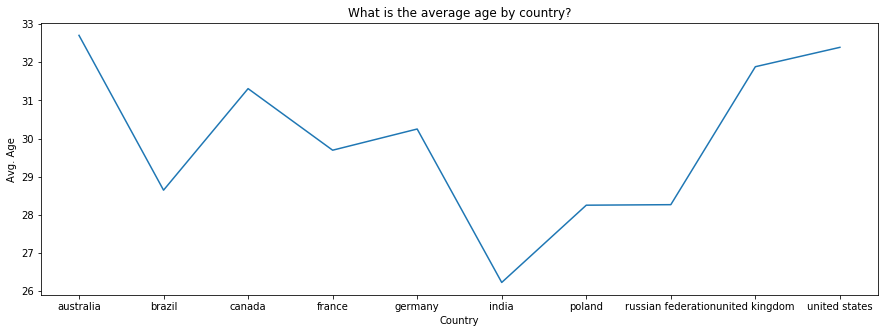

In [30]:
df_top_countries = df_working[df_working['country'].isin(top_countries)].copy()
df_top_countries = df_top_countries.dropna(subset=['age'])
df_top_countries.age = df_top_countries.age.astype(int)

agg_data = df_top_countries.groupby(['country']).age.mean()
x = agg_data.index.values.tolist()
y = agg_data.values.tolist()
plotter(x,y, "Country","Avg. Age", 'What is the average age by country?')

From the above plot, we can see that developing countries have lower age compared to developed countries such as Canda, USA and Australia 

### 3.2.2 What is the average IT Experince by country?

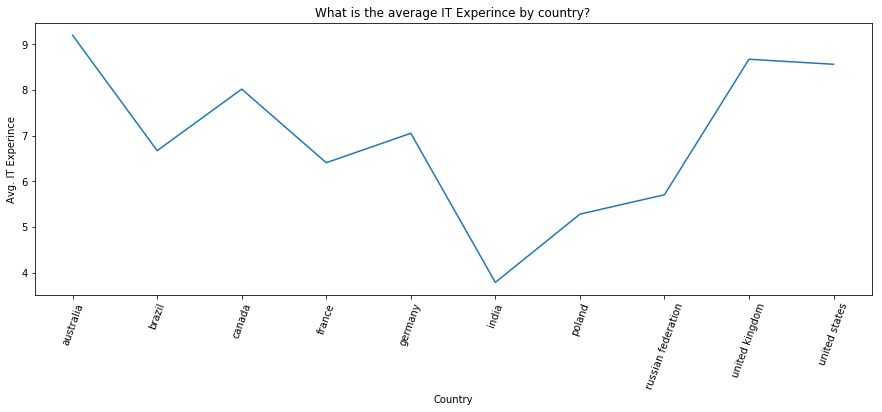

In [70]:
# pick the top 10 countries 
df_top_countries = df_working[df_working['country'].isin(top_countries)].copy()
df_top_countries = df_top_countries.dropna(subset=['ITExperince'])
df_top_countries.ITExperince = df_top_countries.ITExperince.astype(int)

agg_data = df_top_countries.groupby(['country']).ITExperince.mean()
x = agg_data.index.values.tolist()
y = agg_data.values.tolist()
plotter(x,y, "Country","Avg. IT Experince", 'What is the average IT Experince by country?', True)

In the above graph, we can see developed countries have higher avg. IT experince such as Australia and USA. While developing countries have lower avg IT experince such as India 

### 3.2.2 What is the most popular development language? 

['f#', 'visual basic 6', 'python', 'c++', 'scala', 'bash/shell', 'julia', 'delphi/object pascal', 'typescript', 'vb.net', 'rust', 'r', 'cobol', 'hack', 'matlab', 'erlang', 'ocaml', 'kotlin', 'clojure', 'perl', 'c', 'haskell', 'go', 'assembly', 'php', 'c#', 'java', 'vba', 'groovy', 'ruby', 'html', 'objective-c', 'javascript', 'coffeescript', 'swift', 'lua', 'sql', 'css']


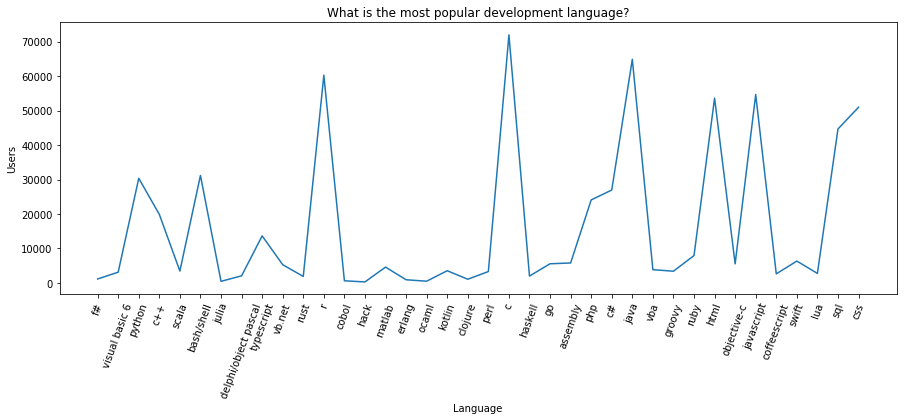

In [69]:
df_list_for_langs= df_working.copy()
df_list_for_langs = df_list_for_langs.dropna(subset=['languages'])
df1 = df_list_for_langs['languages'].str.split(';', expand=True)
list_of_langs_uncleaned = list(set(np.concatenate(df1.values)))

list_of_langs = [i for i in list_of_langs_uncleaned if i]

print(list_of_langs)
df_list_for_langs.head()

langs_count = [0]*len(list_of_langs)

i = 0
for lang in list_of_langs:
    x = df_list_for_langs[[lang in i for i  in  df_list_for_langs.languages]]
    langs_count[i] = len(x.index)
    i = i + 1

plotter(list_of_langs,langs_count, "Language","Users", 'What is the most popular development language?',True)

In the graph above, we can see that in 2018, C and java experinced developers are the highest. Also R with the rise of the data science field. Less developers using F#, Lua and VBA